In [55]:
import os
import pandas as pd


sample_path = "/blue/carpena/haasehelen/ifwaste/output/gsua_test/"
filename = "aggregated_outputs.csv"
df = pd.DataFrame()

foldernames = os.listdir(sample_path)
for (i, folder) in zip(range(len(foldernames)),foldernames): 
    path = sample_path + folder + "/" + filename
    output = pd.read_csv(path)
    if len(df) == 0: 
        df = output
        df["run"] = int(folder.replace("run_", ""))
    else:
        output["run"] = int(folder.replace("run_", ""))
        df = pd.concat([df, output])
    if i > 20: #adapt to number till stabilizing
        break 
        
    
df["household"] = df["household"].astype(int)
df.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,n_shop,n_quickshop,run
0,250,163.110,72.205,155.858,69.181,66.273,83.639,124.782,199.247,463.151,72.649,391.546,218.719,124.782,100.0,0.0,61.0,13.0,85.0,20
1,104,171.148,136.928,211.514,84.704,100.234,131.507,334.571,248.890,664.069,257.645,584.318,251.717,334.571,100.0,0.0,0.0,15.0,100.0,20
2,141,150.778,88.910,216.121,79.061,113.183,120.071,235.623,224.923,622.769,156.055,534.260,233.864,235.623,100.0,0.0,0.0,15.0,100.0,20
3,3,112.856,117.283,202.373,77.377,120.068,95.179,183.380,197.577,629.376,81.564,529.676,195.460,183.380,100.0,0.0,0.0,10.0,100.0,20
4,216,185.323,139.658,198.819,75.184,63.705,83.661,92.744,260.264,543.636,35.194,471.809,274.541,92.744,99.0,1.0,56.0,13.0,82.0,20


In [56]:
len(df)

8448

In [57]:
print(df[df["household"] == 1].to_string())

     household   FGMEAT  FGDAIRY  FGVEGETABLE  FGDRYFOOD  FGSNACKS  FGBAKED  FGSTOREPREPARED  Inedible Parts  Plate Waste  Spoiled Food  Prepared  Unprepared  Preprepared  n_quickcook  n_cook  n_leftovers  n_shop  n_quickshop  run
245          1  116.790   70.555      131.595     84.546    83.035   94.709          162.330         155.660      549.029        38.870   428.270     152.960      162.330        100.0     0.0         33.0    10.0         94.0   20
296          1  144.390   93.127      162.729     90.665    63.202  112.835          151.756         177.057      559.466        82.182   470.700     196.249      151.756        100.0     0.0         75.0    10.0         67.0   28
353          1  146.896  142.671      185.969     83.762    92.879   67.832          141.377         218.409      570.298        72.678   494.440     225.569      141.377        100.0     0.0         24.0    10.0         93.0    3
108          1  177.366  133.411      193.290    138.170    87.207   85.184 

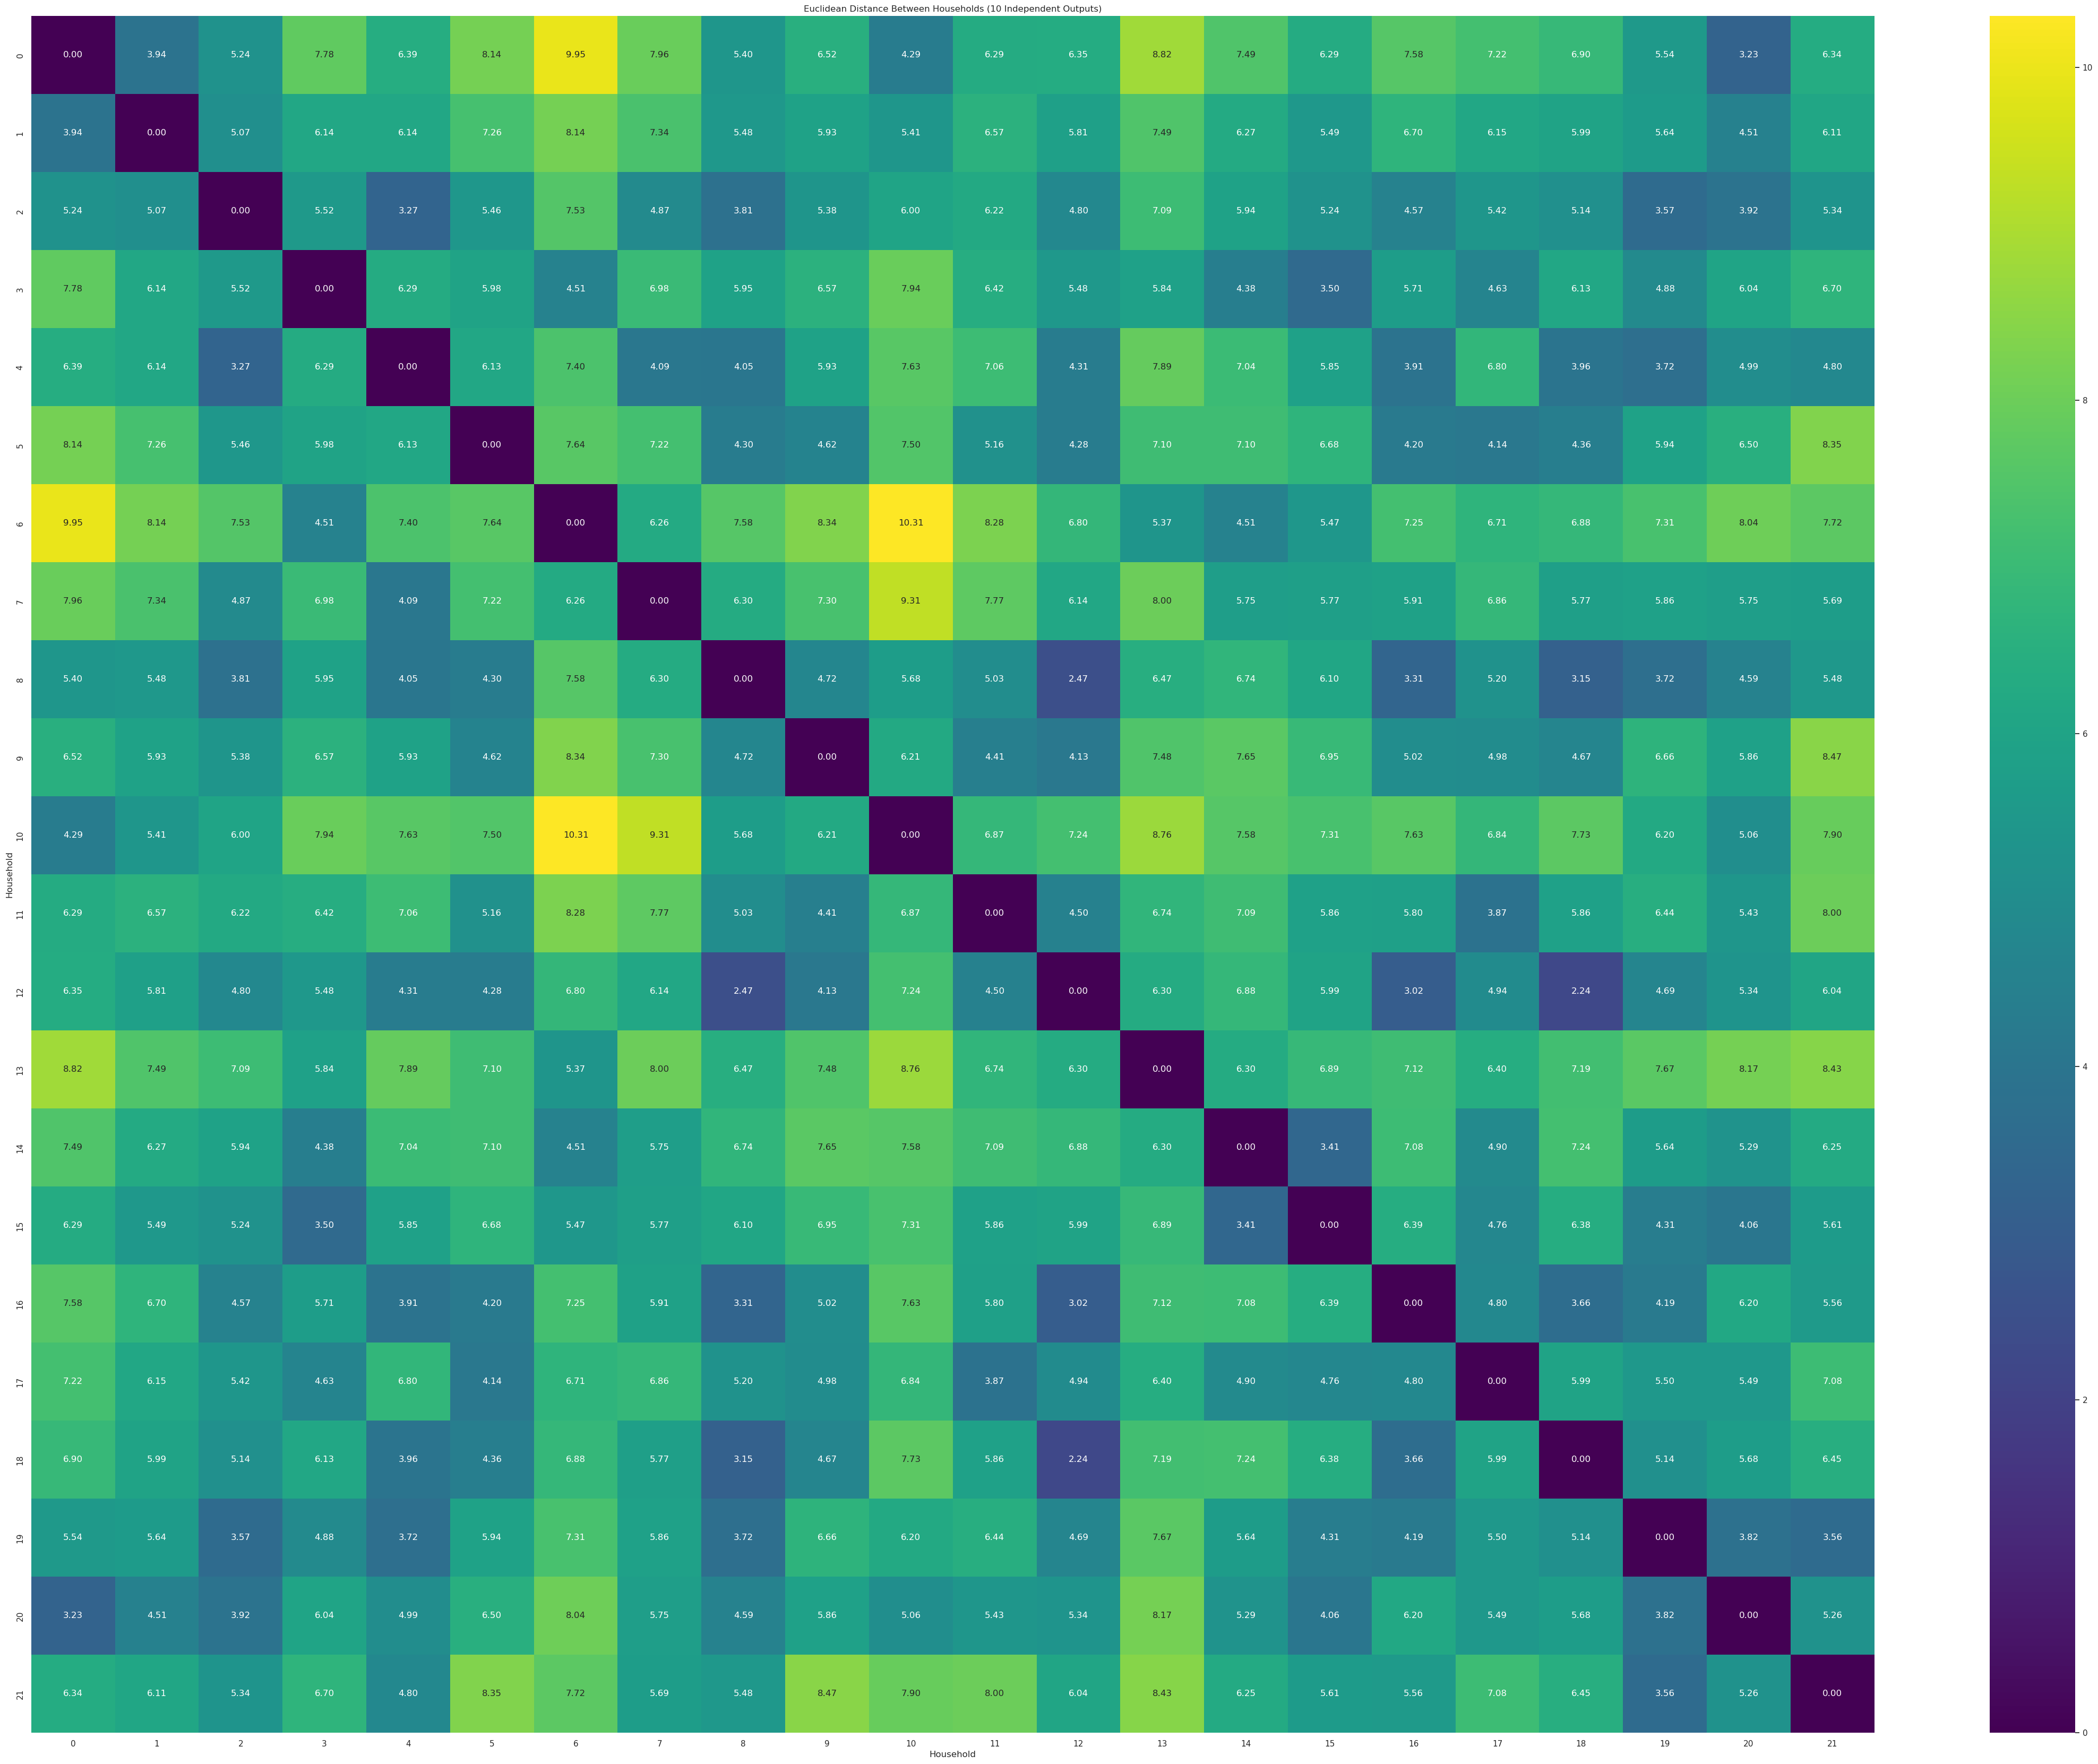

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler


household_1 = df[df["household"] == 1]
household_1 = household_1.drop(columns=["household"])
for column in household_1.columns:
    household_1[column+"_mean"] = household_1[column].mean()

scaler = StandardScaler()
household_1_scaled = scaler.fit_transform(household_1.values)

# Step 3: compute pairwise Euclidean distance
dist_matrix = squareform(pdist(household_1_scaled, metric='euclidean'))

# Step 4: visualize
plt.figure(figsize=(56,42))
sns.heatmap(dist_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=True, yticklabels=True)
plt.title("Euclidean Distance Between Households (10 Independent Outputs)")
plt.xlabel("Household")
plt.ylabel("Household")
plt.show()


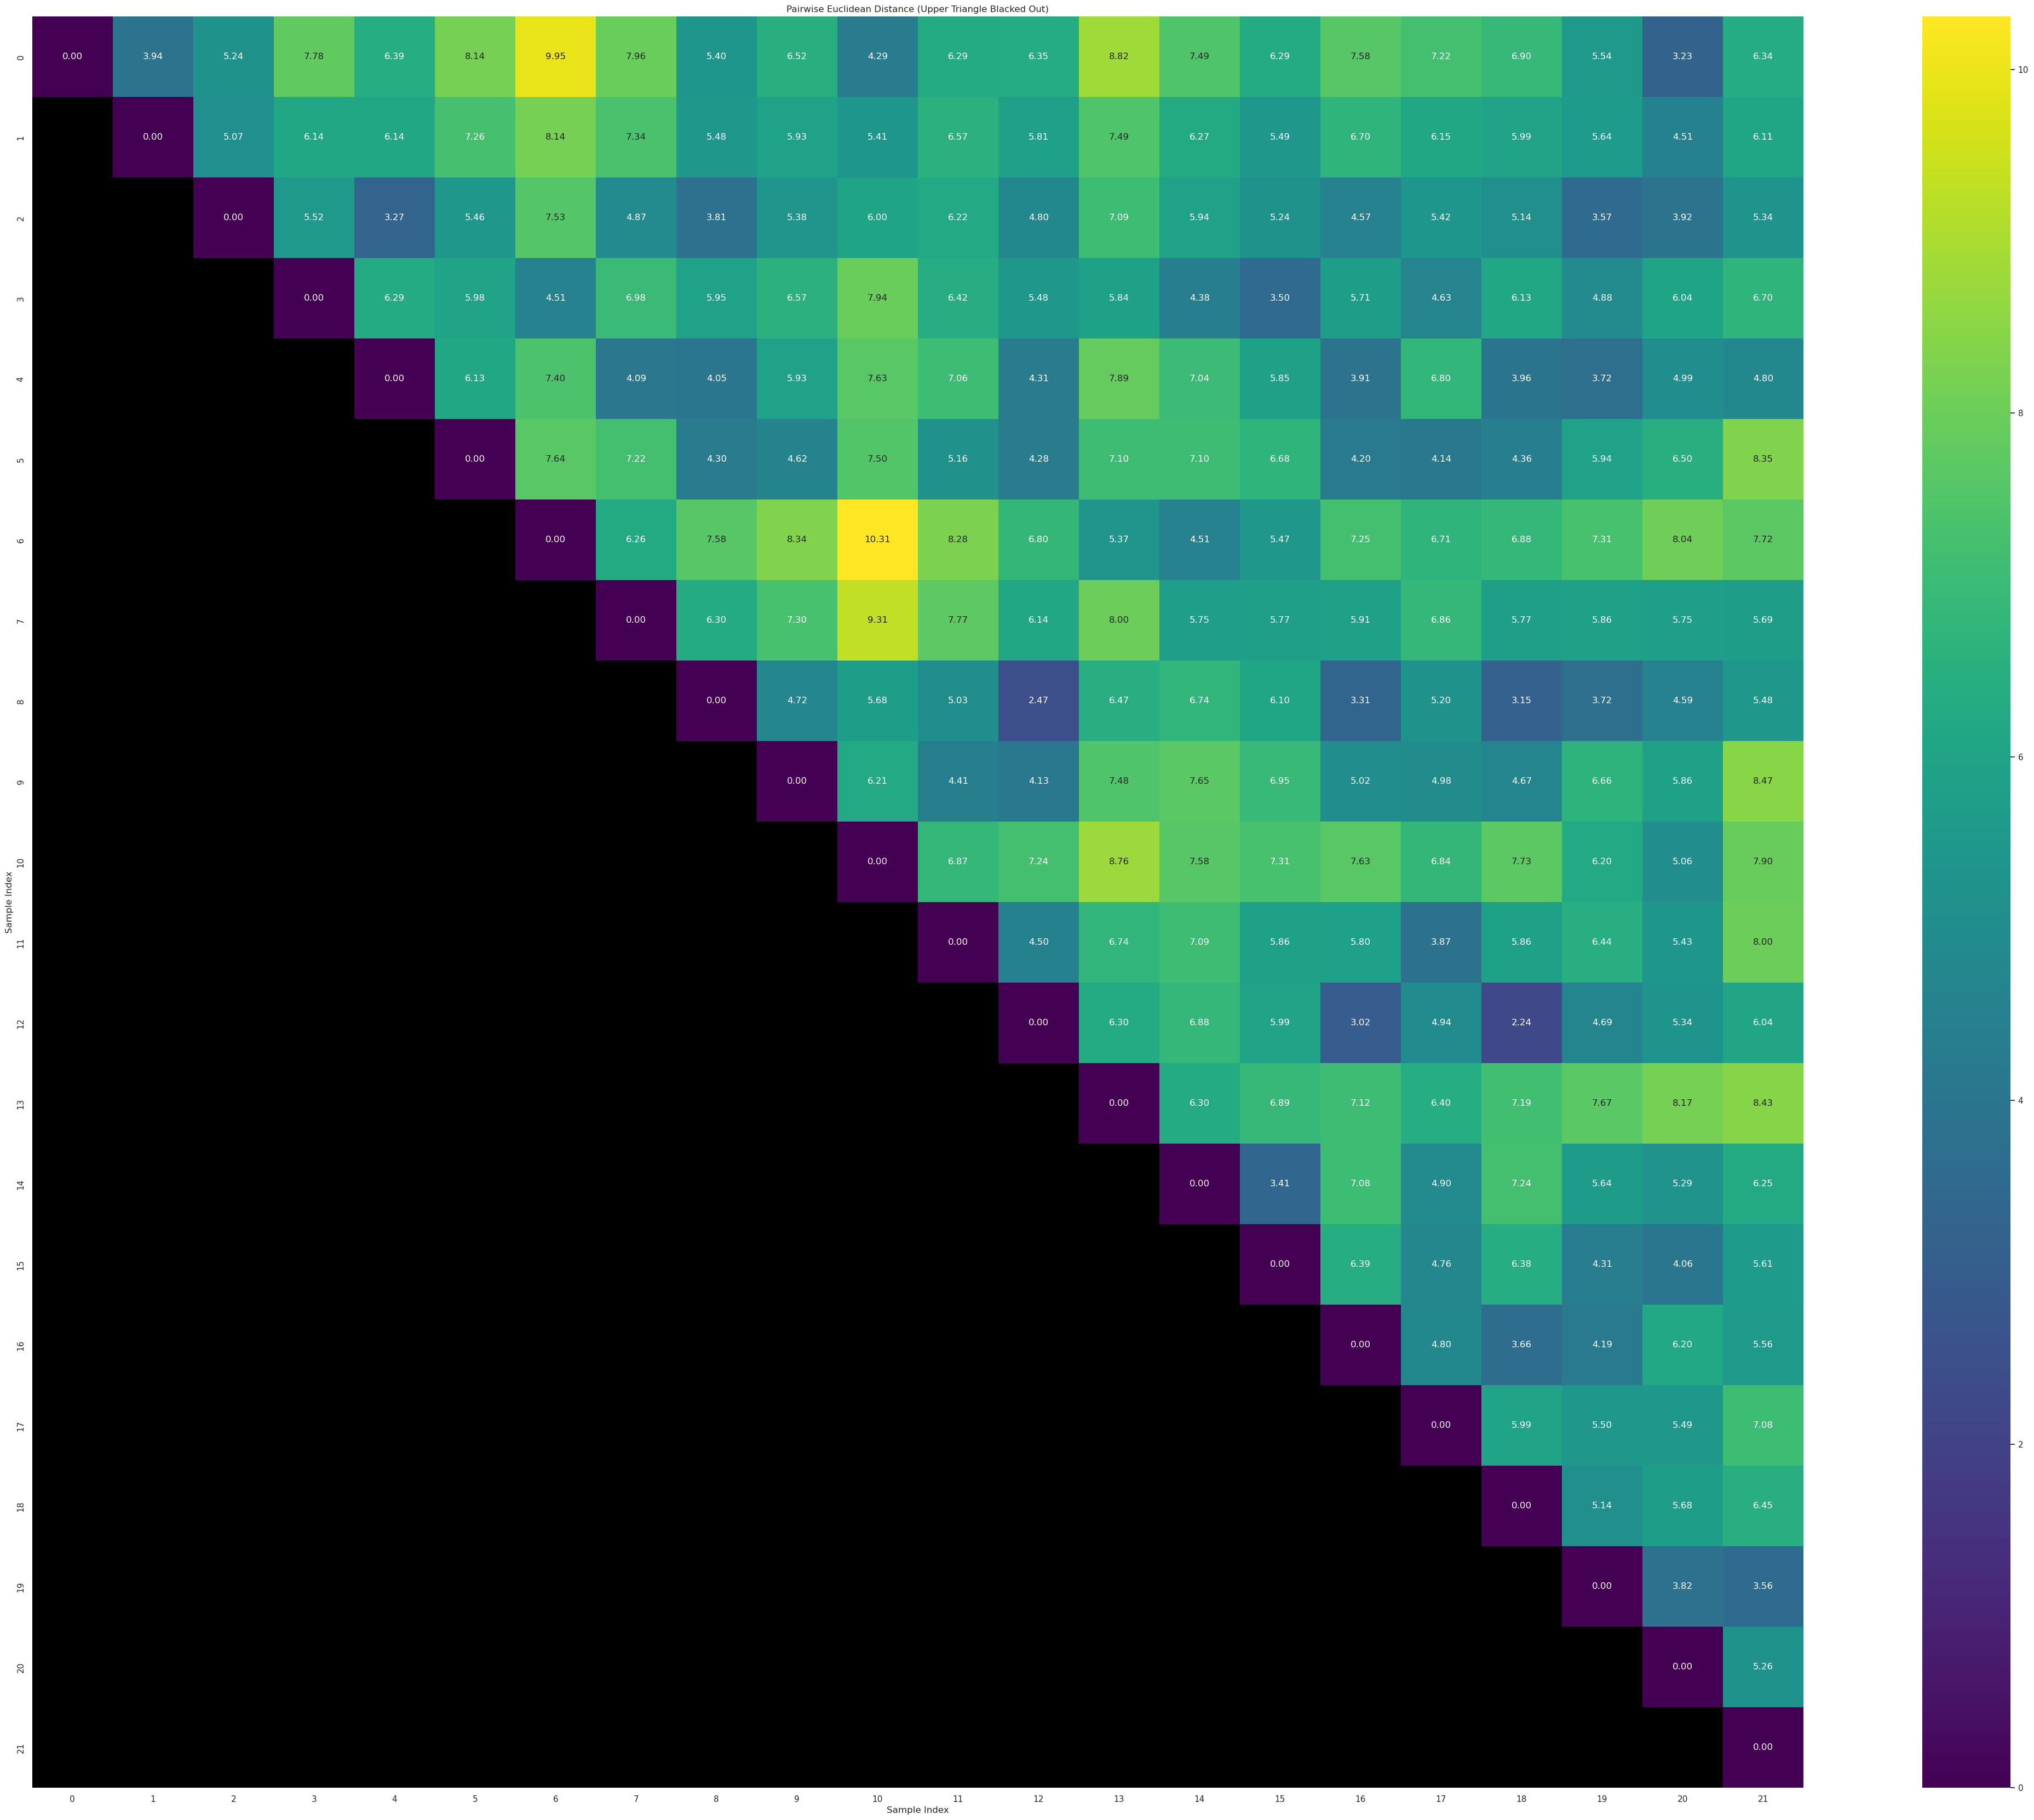

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Filter and prepare the data
household_1 = df[df["household"] == 1].drop(columns=["household"])
for column in household_1.columns:
    household_1[column + "_mean"] = household_1[column].mean()

scaler = StandardScaler()
household_1_scaled = scaler.fit_transform(household_1.values)

# Compute pairwise Euclidean distance
dist_matrix = squareform(pdist(household_1_scaled, metric='euclidean'))

# Create mask for upper triangle
mask = ~np.triu(np.ones_like(dist_matrix, dtype=bool))

# Create a colormap with black for masked values
cmap = sns.color_palette("viridis", as_cmap=True)
cmap_with_black = cmap
cmap_with_black.set_bad(color='black')  # Set masked color to black

# Plot with mask
plt.figure(figsize=(56,42))
sns.heatmap(dist_matrix,
            annot=True,
            fmt=".2f",
            cmap=cmap_with_black,
            mask=mask,
            xticklabels=True,
            yticklabels=True,
            square=True,
            cbar=True)

plt.title("Pairwise Euclidean Distance (Upper Triangle Blacked Out)")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.show()


In [60]:
household_1

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,...,Spoiled Food_mean,Prepared_mean,Unprepared_mean,Preprepared_mean,n_quickcook_mean,n_cook_mean,n_leftovers_mean,n_shop_mean,n_quickshop_mean,run_mean
245,116.790,70.555,131.595,84.546,83.035,94.709,162.330,155.660,549.029,38.870,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
296,144.390,93.127,162.729,90.665,63.202,112.835,151.756,177.057,559.466,82.182,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
353,146.896,142.671,185.969,83.762,92.879,67.832,141.377,218.409,570.298,72.678,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
108,177.366,133.411,193.290,138.170,87.207,85.184,127.229,214.878,637.691,89.288,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
244,150.832,159.066,180.546,78.367,75.724,79.091,115.763,238.432,594.737,6.222,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
311,188.464,135.504,193.635,97.576,111.090,135.968,173.257,240.801,647.641,147.052,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
177,149.029,145.899,255.120,104.780,112.605,105.434,74.604,236.521,656.273,54.677,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
200,115.044,185.937,213.483,63.656,98.374,100.490,45.233,237.492,558.002,26.722,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
16,180.188,98.151,175.349,80.554,114.779,96.176,159.895,213.177,610.419,81.494,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273
118,115.793,131.843,209.032,106.904,84.504,126.589,211.624,215.257,588.705,182.328,...,81.435364,539.498864,215.607955,134.148955,99.227273,0.772727,24.909091,10.0,88.954545,25.227273


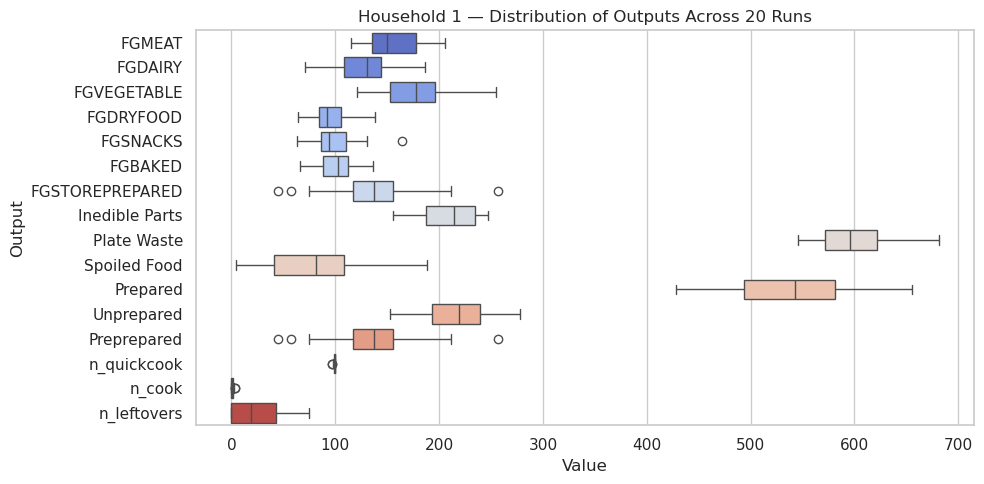

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
household_id = 1
# Set up seaborn theme
sns.set(style="whitegrid")

# Identify the output columns (excluding household/run)
output_cols = [col for col in df.columns if col not in ['household', 'run',"n_shop", "n_quickshop"]]

# Create individual plots per household

household_data = df[df['household'] == household_id]

plt.figure(figsize=(10, 5))
sns.boxplot(data=household_data[output_cols], orient='h', palette='coolwarm')

plt.title(f"Household {household_id} — Distribution of Outputs Across 20 Runs")
plt.xlabel("Value")
plt.ylabel("Output")
plt.tight_layout()
plt.show()

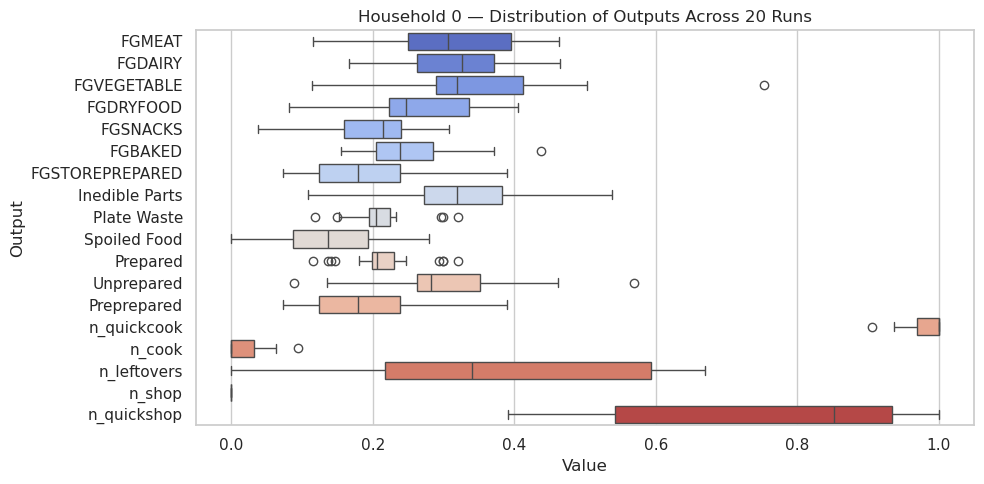

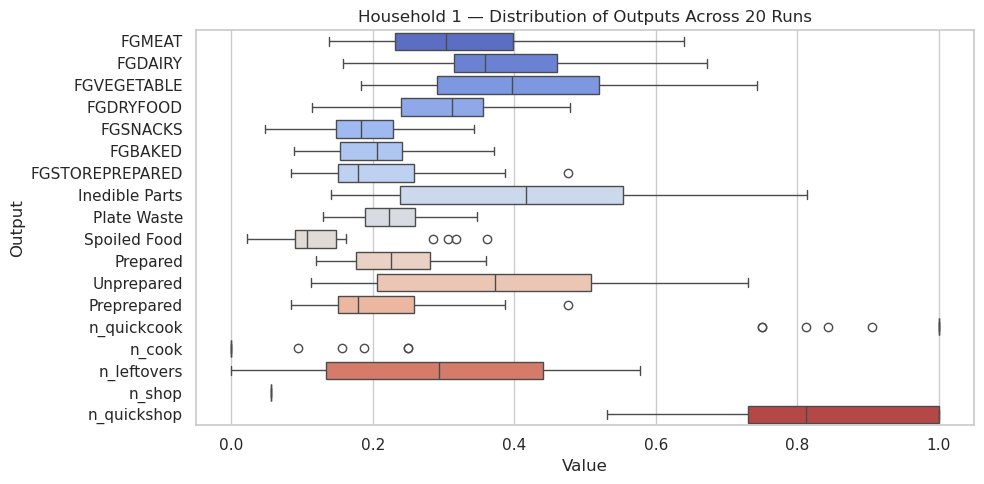

/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


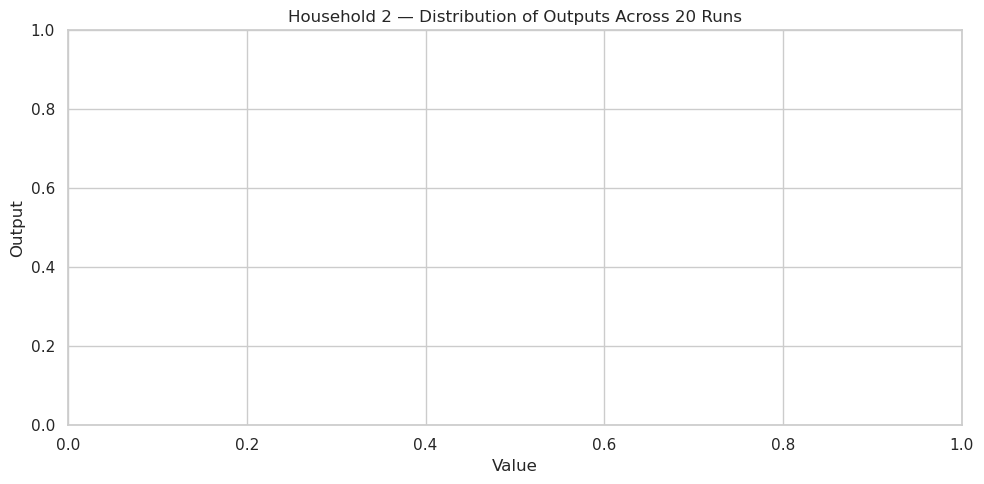

In [62]:

from sklearn import preprocessing


x = df.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled,columns=df.columns)

# Identify the output columns (excluding household/run)
output_cols = [col for col in df.columns if col not in ['household', 'run',]]

# Create individual plots per household
for household_id in range(0,df["household"].max()):
    if household_id > 2: 
        break
    household_data = df_normalized[df_normalized['household'] == household_id]

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=household_data[output_cols], orient='h', palette='coolwarm')
    
    plt.title(f"Household {household_id} — Distribution of Outputs Across 20 Runs")
    plt.xlabel("Value")
    plt.ylabel("Output")
    plt.tight_layout()
    plt.show()



In [63]:
## coefficient of variation:

import pandas as pd

# Create empty DataFrame to store CVs
cv_data = []
cv_df = (
    df.groupby("household")[output_cols]
    .agg(lambda x: np.std(x) / np.abs(np.mean(x)) if np.mean(x) != 0 else np.nan)
    .reset_index()
)



In [64]:
# Count number of outputs with CV above threshold

cv_threshold = 0.5
n_over_threshold = 3
cv_df['num_unstable_outputs'] = (cv_df[output_cols] > cv_threshold).sum(axis=1)
#cv_df = cv_df.drop(columns=["n_shop", "n_quickshop"])
# Reject household if 3 or more outputs are too variable
allowed_households = cv_df[cv_df['num_unstable_outputs'] < n_over_threshold ]['household']

In [65]:
#cv_df = cv_df.drop(columns=["n_shop", "n_quickshop", "num_unstable_outputs"])
cv_df.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,n_shop,n_quickshop,num_unstable_outputs
0,0,0.173960,0.156836,0.244001,0.193709,0.216611,0.192192,0.323085,0.146132,0.081330,0.500840,0.110159,0.157092,0.323085,0.008335,1.301491,0.601990,0.0,0.153719,3
1,1,0.177267,0.205576,0.192159,0.189495,0.208129,0.193534,0.344661,0.129883,0.059145,0.633280,0.112815,0.152750,0.344661,0.009576,1.229679,1.013883,0.0,0.146867,3
2,2,0.219447,0.297581,0.305836,0.294478,0.248533,0.231342,0.315615,0.174999,0.221898,0.605496,0.229021,0.202470,0.315615,0.006335,1.984635,0.988024,0.0,0.104701,3
3,3,0.244559,0.247917,0.211525,0.286427,0.239518,0.276708,0.381890,0.164677,0.174556,0.864381,0.224251,0.167052,0.381890,0.002877,3.162278,1.091137,0.0,0.075056,3
4,4,0.218497,0.156051,0.176817,0.220073,0.165019,0.216534,0.362521,0.130190,0.088912,0.788777,0.110712,0.146006,0.362521,0.009576,1.229679,0.795446,0.0,0.138796,3


In [66]:
cv_matrix

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers
household,,,,,,,,,,,,,,,,
0,0.173960,0.156836,0.244001,0.193709,0.216611,0.192192,0.323085,0.146132,0.081330,0.500840,0.110159,0.157092,0.323085,0.008335,1.301491,0.601990
1,0.177267,0.205576,0.192159,0.189495,0.208129,0.193534,0.344661,0.129883,0.059145,0.633280,0.112815,0.152750,0.344661,0.009576,1.229679,1.013883
2,0.219447,0.297581,0.305836,0.294478,0.248533,0.231342,0.315615,0.174999,0.221898,0.605496,0.229021,0.202470,0.315615,0.006335,1.984635,0.988024
3,0.244559,0.247917,0.211525,0.286427,0.239518,0.276708,0.381890,0.164677,0.174556,0.864381,0.224251,0.167052,0.381890,0.002877,3.162278,1.091137
4,0.218497,0.156051,0.176817,0.220073,0.165019,0.216534,0.362521,0.130190,0.088912,0.788777,0.110712,0.146006,0.362521,0.009576,1.229679,0.795446
5,0.227191,0.183947,0.230472,0.163153,0.195888,0.211135,0.322713,0.157053,0.069644,0.755216,0.115865,0.178827,0.322713,0.005174,2.271563,1.037468
6,0.165600,0.121046,0.243820,0.166196,0.189708,0.192240,0.273640,0.163786,0.067334,0.843060,0.114980,0.164157,0.273640,0.008964,1.783765,0.853440
7,0.242122,0.161347,0.167696,0.202201,0.177631,0.174153,0.406416,0.137859,0.074327,0.882190,0.084155,0.150535,0.406416,0.008934,1.082977,0.870915
8,0.160226,0.190690,0.148234,0.168507,0.207802,0.164479,0.376459,0.130695,0.066550,0.683869,0.075807,0.133724,0.376459,0.006452,1.767767,1.072279


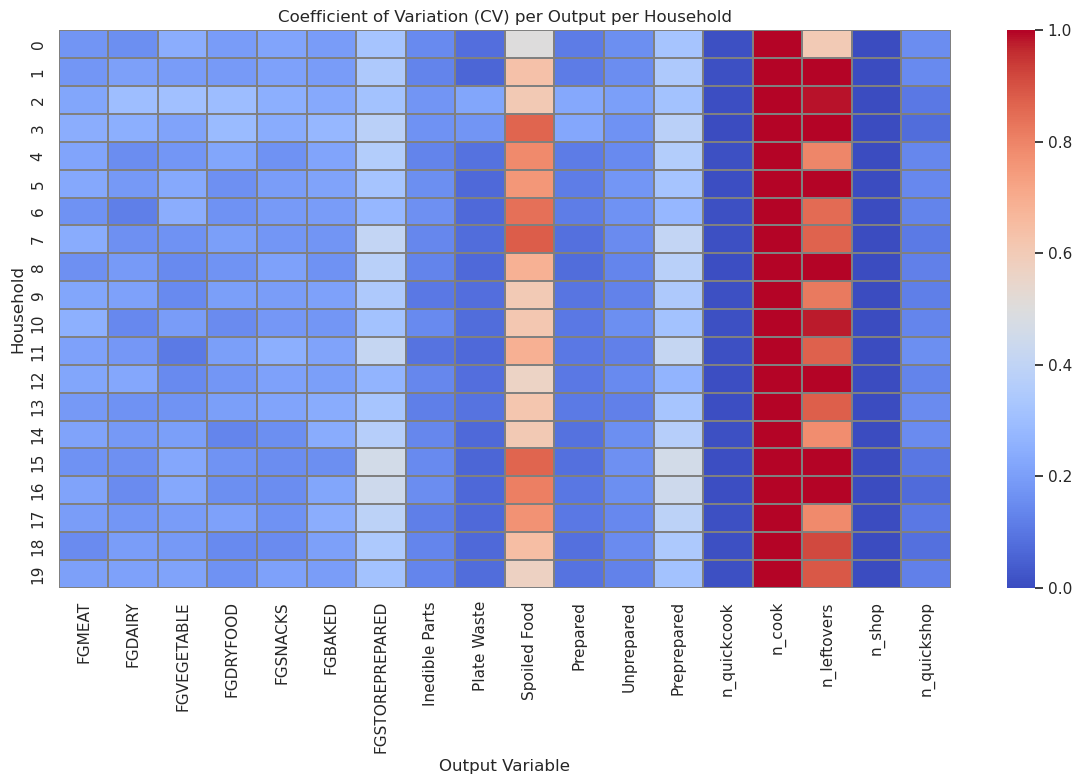

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Set index to household for plotting
cv_matrix = cv_df[cv_df["household"] < 20]
cv_matrix = cv_matrix.set_index('household') 
cv_matrix = cv_matrix.drop(columns=["num_unstable_outputs"])
# Plot the heatmap, scaling color limits
plt.figure(figsize=(12, 8))
sns.heatmap(cv_matrix, cmap='coolwarm', annot=False, linewidths=0.3, linecolor='grey', vmin=0, vmax=1)
plt.title("Coefficient of Variation (CV) per Output per Household")
plt.xlabel("Output Variable")
plt.ylabel("Household")
plt.tight_layout()
plt.show()


In [68]:
cv_df.columns

Index(['household', 'FGMEAT', 'FGDAIRY', 'FGVEGETABLE', 'FGDRYFOOD',
       'FGSNACKS', 'FGBAKED', 'FGSTOREPREPARED', 'Inedible Parts',
       'Plate Waste', 'Spoiled Food', 'Prepared', 'Unprepared', 'Preprepared',
       'n_quickcook', 'n_cook', 'n_leftovers', 'n_shop', 'n_quickshop',
       'num_unstable_outputs'],
      dtype='object')

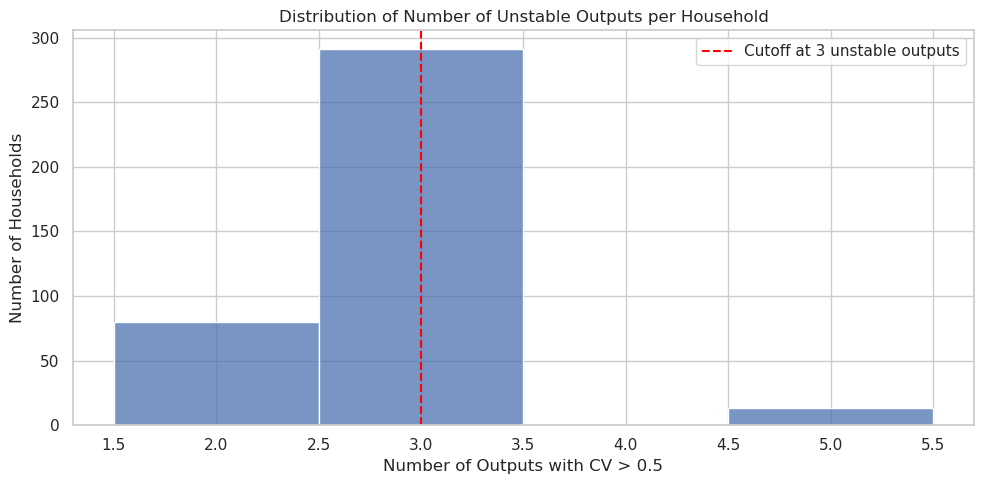

In [69]:
max_unstable = cv_df['num_unstable_outputs'].max()

plt.figure(figsize=(10, 5))
sns.histplot(
    cv_df['num_unstable_outputs'],
    bins=range(0, max_unstable + 2),  # +2 to include last bin
    discrete=True
)
plt.axvline(3, color='red', linestyle='--', label="Cutoff at 3 unstable outputs")
plt.title("Distribution of Number of Unstable Outputs per Household")
plt.xlabel("Number of Outputs with CV > 0.5")
plt.ylabel("Number of Households")
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# Example with points in 3D space
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

# Compute the condensed distance matrix using pdist
condensed_dist = pdist(x)

# Convert the condensed distance matrix to a square distance matrix
square_dist = squareform(condensed_dist)

print("Condensed Distance Matrix:\n", condensed_dist)
print("\nSquare Distance Matrix:\n", square_dist)

# Convert the square distance matrix back to a condensed distance matrix
condensed_dist_again = squareform(square_dist)
print("\nCondensed Distance Matrix (from square):\n", condensed_dist_again)


Condensed Distance Matrix:
 [ 5.19615242 10.39230485 15.58845727  5.19615242 10.39230485  5.19615242]

Square Distance Matrix:
 [[ 0.          5.19615242 10.39230485 15.58845727]
 [ 5.19615242  0.          5.19615242 10.39230485]
 [10.39230485  5.19615242  0.          5.19615242]
 [15.58845727 10.39230485  5.19615242  0.        ]]

Condensed Distance Matrix (from square):
 [ 5.19615242 10.39230485 15.58845727  5.19615242 10.39230485  5.19615242]
